In [3]:
import numpy as np
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import fileinput
import os
import sys
from generate import *

In [4]:
#用到的路径
HOME_DIR = os.environ['HOME']
MODEL_DIR=f"{HOME_DIR}/model/"
BIN_DIR=f"{MODEL_DIR}bin/"
RESOURCE_DIR=f"{MODEL_DIR}resource/"
SET_UP_DIR=f"{MODEL_DIR}setup/"
REPOS_DIR=f"{MODEL_DIR}repos/"
PATCHV1_DIR=f"{REPOS_DIR}patchV1/"
SRC_DIR=f"{PATCHV1_DIR}src/"
PATCHFAST_DIR=f"{MODEL_DIR}patchfast/"
CONDA_DIR=f"{HOME_DIR}/miniconda3/etc/profile.d/conda.sh"

data_save_path=f"{MODEL_DIR}data_save/auto_manage/" #数据存储地址，对同一张图自动保存数据，来达到不用重复运行的目的
img_save_path=f"{MODEL_DIR}data_save/img_save/"               #图片存储地址，具体存储函数见UMRtools
model_log_path=f"{MODEL_DIR}data_save/log/" 

#获得conda路径
env_name = 'neuro'  # 将此处替换为要获取其路径的环境名称
command = f"conda info --envs | awk '/{env_name}/{{print $NF}}'"
env_path = os.popen(command).read().strip()
print(env_path)  
CUDA_LIB=env_path+'/lib/'
print(CUDA_LIB) 
PYTHON_VER="3.10"
sm = "sm_75"
lib_path = CUDA_LIB

#minimal.cfg和minimalTC文件地址
minimalcfg_path = f'{SRC_DIR}minimal.cfg'
minimalTC_path = f'{SRC_DIR}minimalTC'
ori_path=f'{SRC_DIR}ori.sh'

/home/zhaobenyan/miniconda3/envs/neuro
/home/zhaobenyan/miniconda3/envs/neuro/lib/


In [5]:
## 替换minimalTC和minimal.cfg、ori.sh中的路径并指定所用的cfg文件,运行一次即可
for line in fileinput.input(minimalcfg_path, inplace=True):
  if "fdr0=" in line:
      line = f"fdr0={HOME_DIR}/model\n"
  if "inputFolder=" in line and "#inputFolder =" not in line:
      line = f"inputFolder={SET_UP_DIR}\n"
  if "resourceFolder=" in line and "#resourceFolder =" not in line:
      line = f"resourceFolder= {RESOURCE_DIR} \n"
  if "outputFolder=" in line and "#outputFolder =" not in line: #TODO:标一下，这里可能会出问题
      line = f"outputFolder={PATCHFAST_DIR} \n"
  if "repo=" in line:
      line = f"repo={REPOS_DIR}patchV1 \n"
  os.write(sys.stdout.fileno(), line.encode())
fileinput.close()

for line in fileinput.input(minimalTC_path, inplace=True):
  if "repo=" in line:
      line = f"repo={REPOS_DIR}patchV1 \n"
  if "/root/miniconda3/etc/profile.d/conda.sh" in line:
            line = line.replace("/root/miniconda3/etc/profile.d/conda.sh", f"{lib_path}")
  if "fdr0=" in line:
      line = f"fdr0={HOME_DIR}/model\n"
  if "res_fdr=" in line:
      line = f"res_fdr={MODEL_DIR}resource \n"
  if "setup_fdr=" in line:
      line = f"setup_fdr={MODEL_DIR}setup \n"
  if "data_fdr=" in line:
      line = f"data_fdr={MODEL_DIR}patchfast \n"
  os.write(sys.stdout.fileno(), line.encode())
fileinput.close()

for line in fileinput.input(ori_path, inplace=True):
  if "/root/miniconda3/etc/profile.d/conda.sh" in line:
            line = line.replace("/root/miniconda3/etc/profile.d/conda.sh", f"{CONDA_DIR}\n")
  if "activate" in line:
      line = line.replace("conda activate general", "conda activate neuro\n")
  os.write(sys.stdout.fileno(), line.encode())
fileinput.close()

In [65]:
os.system(f'cd {SRC_DIR}/ && ./compile-nonhpc')  #编译patchfast
os.system(f'cd {SRC_DIR}/ && ./gompile-nonhpc')
os.system(f'cd {SRC_DIR}/ && ./rompile-nonhpc')

patch.cu(4408): warning: variable "get_excRangeBound" was declared but never referenced

patch.cu(1342): warning: variable "simpleContrast" was declared but never referenced

ptxas info    : 221856 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z17cudaMemsetNonzeroIfEvPT_jS0_' for 'sm_75'
ptxas info    : Function properties for _Z17cudaMemsetNonzeroIfEvPT_jS0_
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 10 registers, 368 bytes cmem[0]
ptxas info    : 223441 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z19recal_G_mat_nd_fastPfPjS0_S_S_S_S_S0_S0_S_S_S_S_S_S_S_S_S_S_S_S_S_S0_P19curandStateMRG32k3aS_S_S_f16ConductanceShapeS3_jjjjjjijjjjj14LearnVarShapeE14LearnVarShapeQjjb' for 'sm_75'
ptxas info    : Function properties for _Z19recal_G_mat_nd_fastPfPjS0_S_S_S_S_S0_S0_S_S_S_S_S_S_S_S_S_S_S_S_S_S0_P19curandStateMRG32k3aS_S_S_f16ConductanceShapeS3_jjjjjjijjjjj14LearnVarShapeE14LearnVarShapeQjjb
   

0

In [68]:
os.system(f'cd {PATCHV1_DIR}/ && python {PATCHV1_DIR}pinwheel_disk.py') #设置模型中具体神经元的视野范围等
os.system(f'cd {SET_UP_DIR} && {BIN_DIR}retino -c {SRC_DIR}test_lgn.cfg')
os.system(f'cd {SET_UP_DIR} && {BIN_DIR}genCon -c {SRC_DIR}test_v1.cfg')

average areal CMF within 2 degree eccentricity  = 0.116 deg2/mm2
 0.25 mm ~ 0.085 deg with averaged CMF within 2 degree 
Dow et. al., 1981 integration through inversed foveal linear CMF: 0.25 mm ~ 0.01025 deg
ecc = 0.01024565897781334
area = 0.196 mm2, visual area = 3.298e-04 deg2
putative nV1 = 4832
blockified to 5120: 5x1024
#ring: 2, r0 = 0.25
[0.1118034 0.1381966]
[1 4]
[-0.01024566  0.02049132 -0.01024566  0.02049132]
-0.010115622123225736 0.010114665858561937
-0.010116887683884497 0.010116863891924661
632 490 501
512 32
512 parvo cells, 32 magno cells
nV1: 5120 nparvo: 512
n_Mcone = 256, n_Lcone = 256
LGN_ecc = 0.034479771826565295
#candidates = 163, radius = 0.06, seed = 437582
extra 1 LGN cells
short of 1 LGN cells
short of 3 LGN cells
short of 5 LGN cells
short of 7 LGN cells
short of 6 LGN cells
short of 7 LGN cells
short of 3 LGN cells
short of 4 LGN cells
short of 7 LGN cells
short of 3 LGN cells
#candidates = 163, radius = 0.06, seed = 437594
extra 2 LGN cells
 99.8%
26
Us

0

In [69]:
os.system(f'cd {PATCHFAST_DIR} && {BIN_DIR}patch_fast -c {SRC_DIR}minimal.cfg') 

4 gpu on the node
using gpu device 0, with 10825.6Mb memory
CUDA device [NVIDIA GeForce RTX 2080 Ti] has 68 Multi-Processors SM 7.5
total global memory: 11019.562500 Mb.
maximum threads per MP: 1024.
shared memory per block: 49152 bytes.
registers per block: 65536.
single to double performance ratio: 32.

Heap size found to be 8.000000; Stack size found to be 0.000977
Using configuration file: /home/zhaobenyan/model/repos/patchV1/src/minimal.cfg
ignoreRetinogeniculateDelay = 1
simulating for 8000 steps, t = 1000.000000 ms
 collects framed output every 20ms, (160 time steps)
res_suffix: -minimal-patch.bin
conLGN_suffix: -test_lgn.bin
conV1_suffix: -test_v1.bin
synPerCon:
5, 7.5, 4.26, 7.88, 
synPerConFF:
50, 60, 
 nE = 768, nI = 256
 nTypeE = 1, nTypeI = 1
parvo tau = 2048 dt, magno tau = 1024
 inputType = -1
stimulus: 1 frames of 32x32
stimulus range = 0.0344798
stimulus buffer = 0.038328
neye = 1
LGN center visual field pos are within ecc of 0.0344798, while the stimulus ranges in 0.0

0

In [70]:
current_dir = os.getcwd()
os.system(f"cd {current_dir} && chmod +x ./plot.sh && ./plot.sh && cd $HOME"  )

python /home/zhaobenyan/model/merge_test/plotV1_response_merge_test.py merge_test minimal-patch test_lgn test_v1 /home/zhaobenyan/model/resource /home/zhaobenyan/model/setup /home/zhaobenyan/model/patchfast /home/zhaobenyan/model/merge_test 8 1 6 True False False 1
merge_test
minimal-patch
test_lgn
test_v1
/home/zhaobenyan/model/resource
/home/zhaobenyan/model/setup
/home/zhaobenyan/model/patchfast
/home/zhaobenyan/model/merge_test
8.0
1/6
read new spikes
not using fitted data
preset OP plots are plotted
using f4
frameRate = 1
/home/zhaobenyan/model/resource/static_color-grid_0.bin
[ 768 1024]
nE = 768, nI = 256
vL = -65.0, vI = -75.0, vE = 0.0
vR = [-58. -58.], gL = [2.  2.8], vT = [-50. -50.]
sRatioLGN = [0.3 0.3], sRatioV1 = [0.3 0.3 0.9 0.3]
nLGN = 512, nV1 = 5120, dt = 0.125, nt = 8000
blockSize = 1024
reading LGN connections...
     ID...
     vpos...
     fr...
     spikes...
8000 0.125
complete.
dataDim = 2
[5, 1024, 5120, 2]
x:[-0.25, 0.25]
y:[-0.25, 0.25]
vx:[-0.0102456589778

/home/zhaobenyan/model/merge_test/plotV1_response_merge_test.py:1255: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/home/zhaobenyan/model/merge_test/plotV1_response_merge_test.py:1350: RuntimeWarning: divide by zero encountered in double_scalars
  jSF = 1/(2*np.linalg.norm(subRed-subGreen))


LGN id for neuron 13(0-13): [472  26 444 443 467 288 215 216 222 300 301 332]
LGN id for neuron 3502(3-430): [ 87 430 460  88  94  95 416 428 429 153 132 134 150 339 351 130 154 161
 342 344 349]
LGN id for neuron 3497(3-425): [460 428 430 443  40  41  94 153 132 134 339 351 130 154 161 342 344]
LGN id for neuron 2(0-2): [452  62 451 454 169 316 332]
LGN id for neuron 2253(2-205): [444 428 442 445 454  42  49 146 309 330 333 181 331 335 147 190]
LGN id for neuron 2704(2-656): [ 48 442 445 453  47  49 178 190 323 325 330]
LGN id for neuron 952(0-952): [454 452  19  26 444 445 462 465   4   9  42 203 176 177 192 215 216 282
 301 312 314 321 378]
LGN id for neuron 3903(3-831): [428 416 429 440 442 460  41  48  49  87 137 324 132 147 326 334 337 135
 140]
LGN id for neuron 4034(3-962): [477   2  27 478 479 483 498   5   6  22  24  25 222 168 169 179 223 227
 288 296 302 315 332 343]
LGN id for neuron 816(0-816): [ 94 416 429 430 460  41  87  95 323 325 326 137 178 317 324 330 147 175
 190]

Traceback (most recent call last):
  File "/home/zhaobenyan/model/merge_test/plotV1_response_merge_test.py", line 3630, in <module>
    plotV1_response(output_suffix, res_suffix, conLGN_suffix, conV1_suffix, res_fdr, setup_fdr, data_fdr, fig_fdr, TF, iOri, nOri, readNewSpike, usePrefData, collectMeanDataOnly, OPstatus)
  File "/home/zhaobenyan/model/merge_test/plotV1_response_merge_test.py", line 2315, in plotV1_response
    plot_LGN_SF_corr(fign, OPpick, BGpick)
  File "/home/zhaobenyan/model/merge_test/plotV1_response_merge_test.py", line 2278, in plot_LGN_SF_corr
    image = HeatMap(nLGN_V1[OPpick], LGN_SF[OPpick], heatBins, heatBins, ax, 'Reds', log_scale = pLog, intPick = False, tickPick1 = 5)
  File "/home/zhaobenyan/repos/patchV1/src/readPatchOutput.py", line 372, in HeatMap
    h, edge1, edge2 = np.histogram2d(d1, d2, bins = [range1, range2])
  File "<__array_function__ internals>", line 180, in histogram2d
  File "/home/zhaobenyan/miniconda3/envs/neuro/lib/python3.10/site-pack

256

In [55]:
# 输入的grating的.bin文件必须位于dataset/resource且名称与minimal.cfg中的fStimulus一致   
# minimal.cfg中的frameRate要与grating的一致（静态为1）#TODO：确保一致
import numpy as np
import matplotlib.pyplot as plt
#读取_{}_cfg.bin类型的文件，返回grating的sf, ori, phase, contrast
def read_grating_cfg(file):
   """输入文件名，返回"""
   with open(file) as f: #可以去查查with是干嘛的，它是以防你忘记关掉文件，这种表达会比较好
      sf = np.fromfile(f,'f4',1)[0] 
      ori = np.fromfile(f,'f4',1)[0]
      phase = np.fromfile(f,'f4',1)[0]
      contrast = np.fromfile(f,'f4',1)[0] #一般读取到contrast
      #crest = np.fromfile(f,'f4',3)  #波峰
      #valley = np.fromfile(f,'f4',3) #波谷
   return sf, ori, phase, contrast

#读取_{}.bin类型的文件，返回x_1,x_2,x_3,x_4,x_5,x_6
def read_grating_bin(file):
   with open(file) as f:
      x_1 = np.fromfile(f, 'i4', 1)  #np.array([-1]).astype('i4').tofile(f) 
      x_2 = np.fromfile(f, 'i4', 3)  #np.array([nFrame, npixel, npixel], dtype='i4').tofile(f)
      nFrame=x_2[0]
      size=x_2[1]
      x_3 = np.fromfile(f, 'f4', 3)  #mean_value.astype('f4').tofile(f) mean_value = (c1+c2)/2
      x_4 = np.fromfile(f, 'f4', 2)  #np.array([buffer_ecc, ecc], dtype='f4').tofile(f)
      x_5 = np.fromfile(f, 'u4', 1)  #np.array([neye]).astype('u4').tofile(f)
      x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)  #LMS_seq.astype('f4').tofile(f)
   return x_1,x_2,x_3,x_4,x_5,x_6

#读取输出文件，怎么写入的在repos/patchV1/src/patch.cu搜fSample
def read_spike(file):
   with open(file) as f:
      sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
      sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
      nt = np.fromfile(f, 'u4', 1)[0]
      nLGN = np.fromfile(f, 'u4', 1)[0]
      LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
      sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
      sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
      fr = sample_spikeCount/(sample_t1-sample_t0)*1000
   LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
   return LGN_spike_time,fr

In [56]:
inputfile='/home/zhaobenyan/model/resource/static_color-grid_test1.bin'
outputfile='/home/zhaobenyan/model/patchfast/sample_spikeCount-merge_test_1.bin'

In [57]:
x_1,x_2,x_3,x_4,x_5,x_6=read_grating_bin(inputfile)
print(x_1,x_2,x_3,x_4,x_5,x_6.shape)
LGN_spike_time,fr=read_spike(outputfile)


[-1] [ 1 32 32] [0.5 0.5 0.5] [0.03832797 0.03447977] [1] (3072,)


(array([1889.,  679.,  134.,   77.,   44.,   46.,   40.,   52.,   28.,
          34.,   35.,   24.,   29.,   31.,   26.,   35.,   27.,   23.,
          19.,   34.,   28.,   21.,   21.,   24.,   17.,   20.,   25.,
          24.,   20.,   30.,   23.,   15.,   19.,   15.,   14.,   16.,
          18.,    8.,   13.,    9.,   13.,   12.,   18.,    7.,    6.,
          11.,    4.,   10.,    4.,    2.,    6.,    7.,    6.,    5.,
           5.,    4.,    2.,    4.,    5.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <BarContainer object of 59 artists>)

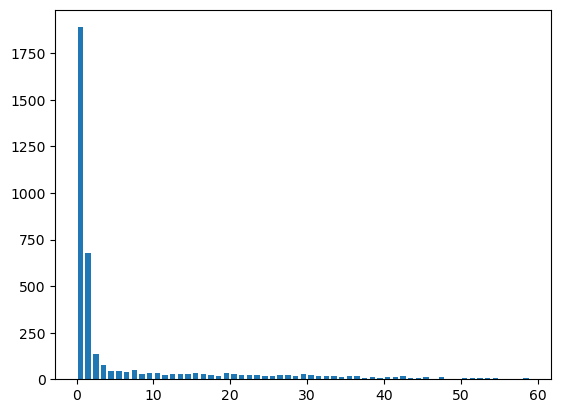

In [58]:
plt.hist(fr,bins=np.arange(0,60,1),rwidth=0.7)

In [59]:
def Read_LGN_vpos():
    # LGN_vpos_file = '/home/zhaobenyan/dataset/resource/LGN_vpos_minimal-patch.bin'
    LGN_vpos_file='/home/zhaobenyan/model/resource/LGN_vpos-minimal-patch.bin'
    fp = 'f4'
    with open(LGN_vpos_file, 'rb') as f:
        nparvo, zero = np.fromfile(f, dtype='u4', count=2)
        ecc = np.fromfile(f, dtype=fp, count=1)[0]
        cart = np.fromfile(f, dtype=fp, count=4)
        parvo_cart = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))
        RG_OnOff = np.fromfile(f, dtype='u4', count=nparvo)
        parvo_polar = np.fromfile(f, dtype=fp, count=nparvo*2).reshape((2,nparvo))
        LGN_ecc=-cart[0]
    return ecc,LGN_ecc,parvo_cart

In [60]:
def acuity(ecc):
   k = 0.2049795945022049
   log_cpd0 = 3.6741080244555278
   cpd = np.exp(-k*ecc + log_cpd0)
   return 2/cpd/4  #1:半径 2：直径 单位：角度（degrees）

def compute_lgn_radius():
   ecc,LGN_ecc,parvo_cart=Read_LGN_vpos()
   eccs = np.sqrt(np.sum(parvo_cart ** 2, axis=1))
   radius=acuity(eccs)
   return parvo_cart,radius

In [61]:
#LGN_vpos_file='/home/zhaobenyan/model/resource/LGN_vpos-minimal-patch.bin'
ecc, LGN_ecc, parvo_cart=Read_LGN_vpos()
npixel=32
range_deg = 0.0344   #与生成grating时的一致
buffer_deg = acuity(range_deg)*4  
deg_per_pixel=2*(range_deg+buffer_deg)/npixel  #这里应该乘2
radius=compute_lgn_radius()

print(f'ecc={ecc}')
print(f"LGN_ecc={LGN_ecc}")
print(f'acuity(range_deg)={acuity(range_deg)}')
print(f'range_deg = {range_deg}, buffer_deg = {buffer_deg}')
print(f'range_deg+buffer_deg={range_deg+buffer_deg}')
print(f'deg_per_pixel={deg_per_pixel}')
print(f"ecc/(range_deg+buffer_deg)/2={ecc/(range_deg+buffer_deg)/2}")
print(f"LGN_ecc/(range_deg+buffer_deg)/2={LGN_ecc/(range_deg+buffer_deg)/2}")

ecc=0.034479770809412
LGN_ecc=0.034479770809412
acuity(range_deg)=0.012775782312929865
range_deg = 0.0344, buffer_deg = 0.05110312925171946
range_deg+buffer_deg=0.08550312925171946
deg_per_pixel=0.005343945578232466
ecc/(range_deg+buffer_deg)/2=0.20162870710792505
LGN_ecc/(range_deg+buffer_deg)/2=0.20162870710792505


x=[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
acuity(x)=[0.01268601 0.01271204 0.01273813 0.01276426 0.01279046 0.0128167
 0.012843   0.01286935 0.01289576 0.01292222 0.01294873]


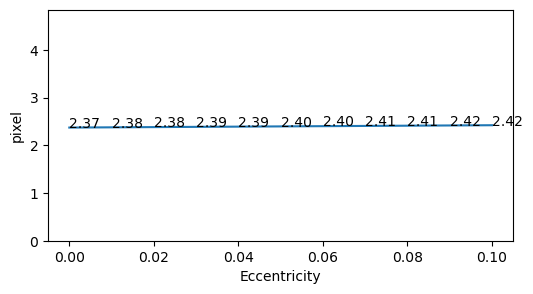

In [62]:
#画图
x = np.linspace(0, 0.1, 11)
print(f'x={x}')
print(f'acuity(x)={acuity(x)}')
y = acuity(x)/deg_per_pixel   
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y)
plt.ylim(0,np.max(y)*2)
for i, j in zip(x, y):
    ax.text(i, j, '{:.2f}'.format(j))
ax.set_xlabel('Eccentricity')
ax.set_ylabel('pixel')
plt.show()

In [49]:
#读取grating的数据  file:文件路径 static_color-grid_{}.bin类型的文件.并转化为(size,size,3)大小的数组
#只适用于nFrame=1的grating
def image_to_tensor(file):
    with open(file) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        image_numpy = x_6.reshape(3,size, size)
    return image_numpy.transpose([1,2,0])

(32, 32, 3)


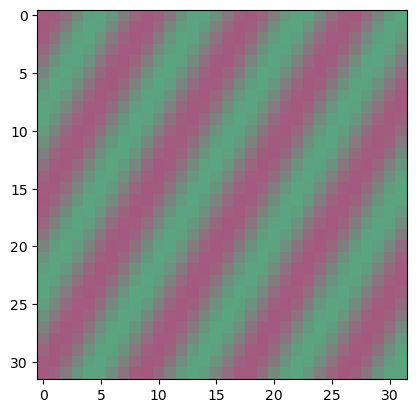

In [50]:
# 读取图像
file='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate1_phase=pi/static_color-grid_3.bin'
pixel_array = image_to_tensor(file)
print(pixel_array.shape)
plt.imshow(pixel_array)


<Figure size 600x600 with 0 Axes>

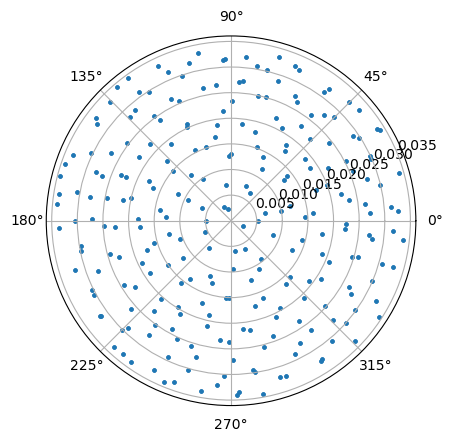

In [52]:
# 生成随机点的笛卡尔坐标
points = parvo_cart
radii = radius
fig = plt.figure(figsize=(6, 6))
# fig = plt.figure(facecolor='none')
fig = plt.figure()
fig.patch.set_alpha(0.0) # 将背景透明度设置为 0
ax1 = fig.add_subplot(111, projection='polar')
# 将笛卡尔坐标转换为极坐标
r = np.sqrt(points[0, :]**2 + points[1, :]**2)
theta = np.arctan2(points[1, :], points[0, :])
# 绘制极坐标图
# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax1.scatter(theta, r, s=5)
plt.show()